# ML Model Pipeline: Feature Selection

**Predicting House Sale Price**

The aim of the project is to develop a machine learning model to predict house sale prices using features that describe various aspects of a house.

**Goals**

- To be able to understand the features that affect the price of houses in the Market.
- To determine the significant features on which the house price depend on.
- To develop a model that predicts the price of a house using the selected/important factors.

**Data Source:**
- Ames Housing dataset 
    - This dataset originates from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    
**Credits:**
- www.kaggle.com - This project wouldnt have been possible without Ames dataset from www.kaggle.com
- Optimal alpha parameter - https://www.scikit-yb.org/en/latest/api/regressor/alphas.html


## Import Libraries

In [1]:
#libs for data processing
import pandas as pd
import numpy as np

#libs for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#size plot/graph dimensions for matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#Display all the columns 
pd.pandas.set_option('display.max_columns',None)

#Display matplotlib output inline.
%matplotlib inline

#Model training
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#Optimal value for alpha parameter
#ref: https://www.scikit-yb.org/en/latest/api/regressor/alphas.html
from sklearn.linear_model import LassoCV
from yellowbrick.regressor.alphas import alphas

#suppress warnings
import warnings
warnings.simplefilter(action='ignore')


# Read Data

In [2]:
try:
    X_train = pd.read_csv('my_Xtrain.csv')
    X_test = pd.read_csv('my_Xtest.csv')
    print(f'[SUCCESS] Done loading the dataset...')
    
except:
    print(f'Unable to load the dataset!')

[SUCCESS] Done loading the dataset...


#### Visualize table/Dataframe

In [3]:
#Visualize the X_train table/Dataframe
X_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,136,0.000000,0.75,0.495064,0.406983,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.541667,0.375,0.6,0.75,0.571429,0.666667,0.625,0.279412,0.639344,0.8,0.333333,0.692308,0.666667,0.50,0.208999,0.333333,1.0,1.0,0.50,0.75,0.25,0.833333,0.000000,0.666667,0.0,0.558219,0.213421,1.0,0.75,1.0,1.0,0.611775,0.000000,0.0,0.571872,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.416667,1.0,0.333333,0.8,0.833333,0.355140,0.333333,0.5,0.373766,0.6,1.0,1.0,0.114352,0.000000,0.0,0.0,0.0,0.0,0.0,0.50,0.5,0.0,0.363636,0.5,0.625,0.6,12.066811
1,1453,0.941176,0.25,0.189077,0.203387,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.166667,0.375,0.6,1.00,0.714286,0.444444,0.500,0.007353,0.032787,0.2,0.333333,0.846154,0.733333,0.50,0.058055,0.333333,1.0,1.0,0.75,0.75,1.00,1.000000,0.096917,0.666667,0.0,0.000000,0.089525,1.0,0.75,1.0,1.0,0.441306,0.000000,0.0,0.412522,0.333333,0.0,0.333333,0.0,0.250,0.5,0.333333,0.250000,1.0,0.000000,0.0,0.666667,0.009346,1.000000,0.5,0.370240,0.6,1.0,1.0,0.000000,0.051188,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.363636,0.0,0.625,0.6,11.884489
2,763,0.235294,1.00,0.456066,0.370696,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.791667,0.375,0.6,0.75,0.857143,0.666667,0.500,0.007353,0.032787,0.2,0.333333,0.846154,0.733333,0.25,0.000000,0.333333,1.0,1.0,0.75,0.75,0.50,1.000000,0.004252,0.666667,0.0,0.313356,0.123732,1.0,1.00,1.0,1.0,0.313126,0.379177,0.0,0.542275,0.000000,0.0,0.666667,0.5,0.375,0.5,0.666667,0.416667,1.0,0.000000,0.0,0.833333,0.009346,0.333333,0.5,0.433004,0.6,1.0,1.0,0.197200,0.082267,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.454545,1.0,1.000,0.6,12.279323


In [4]:
#Visualize the X_test table/Dataframe
X_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,893,0.000000,0.75,0.445638,0.365508,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.291667,0.375,0.6,0.75,0.571429,0.555556,0.875,0.316176,0.065574,0.8,0.333333,0.538462,0.600000,0.25,0.000000,0.333333,1.00,0.4,0.5,0.75,0.25,1.000000,0.117470,0.666667,0.0,0.169521,0.173322,1.0,0.50,1.0,1.0,0.439892,0.000000,0.0,0.411200,0.000000,0.5,0.333333,0.0,0.375,0.5,0.333333,0.333333,1.0,0.000000,0.0,0.833333,0.401869,0.666667,0.25,0.186178,0.6,1.0,1.0,0.224037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.50,0.5,0.0,0.090909,0.00,0.625,0.6,11.947949
1,1106,0.235294,0.75,0.570180,0.439121,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.375,0.6,0.75,0.857143,0.777778,0.500,0.117647,0.262295,0.2,0.333333,0.538462,0.600000,0.50,0.262700,0.666667,1.00,1.0,1.0,0.75,0.75,1.000000,0.182849,0.666667,0.0,0.184503,0.239444,1.0,1.00,1.0,1.0,0.568437,0.543341,0.0,0.728921,0.333333,0.0,0.666667,0.5,0.375,0.5,0.666667,0.583333,1.0,0.666667,0.6,0.833333,0.149533,0.666667,0.50,0.502116,0.6,1.0,1.0,0.217036,0.058501,0.000000,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.272727,1.00,0.625,0.6,12.691580
2,414,0.058824,0.25,0.363044,0.377814,1.0,0.0,0.000000,0.333333,1.0,0.00,0.0,0.208333,0.000,0.6,0.75,0.571429,0.444444,0.625,0.610294,1.000000,0.2,0.333333,0.384615,0.400000,0.25,0.000000,0.333333,1.00,0.4,0.5,0.75,0.25,0.833333,0.000000,0.666667,0.0,0.431507,0.164975,1.0,0.75,1.0,0.5,0.425446,0.000000,0.0,0.397696,0.000000,0.0,0.333333,0.0,0.250,0.5,0.333333,0.250000,1.0,0.333333,0.8,0.333333,0.775701,0.333333,0.50,0.253879,0.6,1.0,1.0,0.000000,0.000000,0.235507,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.181818,1.00,0.625,0.6,11.652687
3,523,0.176471,0.25,0.321097,0.263645,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.125000,0.250,0.6,0.75,0.285714,0.555556,0.750,0.433824,0.934426,0.2,0.333333,0.923077,0.866667,0.25,0.000000,0.333333,0.75,0.4,0.5,0.75,0.25,0.666667,0.070695,0.666667,0.0,0.258990,0.164321,1.0,1.00,1.0,1.0,0.416506,0.319613,0.0,0.568066,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.416667,1.0,0.666667,0.8,0.333333,0.523364,0.333333,0.50,0.296192,0.6,1.0,1.0,0.000000,0.043876,0.065217,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.818182,0.00,0.625,0.6,11.976659
4,1037,0.000000,0.75,0.534524,0.449114,1.0,1.0,0.333333,1.000000,1.0,0.00,0.0,0.833333,0.375,0.6,0.75,0.571429,0.888889,0.500,0.014706,0.032787,0.8,0.333333,0.846154,0.733333,1.00,0.050798,0.666667,1.00,1.0,1.0,0.75,1.00,1.000000,0.181077,0.666667,0.0,0.255993,0.265139,1.0,1.00,1.0,1.0,0.597562,0.000000,0.0,0.558586,0.333333,0.0,0.666667,0.0,0.250,0.5,1.000000,0.333333,1.0,0.333333,1.0,0.833333,0.009346,1.000000,0.75,0.643159,0.6,1.0,1.0,0.266044,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.727273,0.75,0.625,0.6,12.661914


##### Capture the dependent variable
- Recall that the target variable was log transformed.


In [5]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

##### Drop unnecessary variables

In [6]:
X_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
X_test.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [7]:
X_train.head(3)
#X_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.75,0.495064,0.406983,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.541667,0.375,0.6,0.75,0.571429,0.666667,0.625,0.279412,0.639344,0.8,0.333333,0.692308,0.666667,0.50,0.208999,0.333333,1.0,1.0,0.50,0.75,0.25,0.833333,0.000000,0.666667,0.0,0.558219,0.213421,1.0,0.75,1.0,1.0,0.611775,0.000000,0.0,0.571872,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.416667,1.0,0.333333,0.8,0.833333,0.355140,0.333333,0.5,0.373766,0.6,1.0,1.0,0.114352,0.000000,0.0,0.0,0.0,0.0,0.0,0.50,0.5,0.0,0.363636,0.5,0.625,0.6
1,0.941176,0.25,0.189077,0.203387,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.166667,0.375,0.6,1.00,0.714286,0.444444,0.500,0.007353,0.032787,0.2,0.333333,0.846154,0.733333,0.50,0.058055,0.333333,1.0,1.0,0.75,0.75,1.00,1.000000,0.096917,0.666667,0.0,0.000000,0.089525,1.0,0.75,1.0,1.0,0.441306,0.000000,0.0,0.412522,0.333333,0.0,0.333333,0.0,0.250,0.5,0.333333,0.250000,1.0,0.000000,0.0,0.666667,0.009346,1.000000,0.5,0.370240,0.6,1.0,1.0,0.000000,0.051188,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.363636,0.0,0.625,0.6
2,0.235294,1.00,0.456066,0.370696,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.791667,0.375,0.6,0.75,0.857143,0.666667,0.500,0.007353,0.032787,0.2,0.333333,0.846154,0.733333,0.25,0.000000,0.333333,1.0,1.0,0.75,0.75,0.50,1.000000,0.004252,0.666667,0.0,0.313356,0.123732,1.0,1.00,1.0,1.0,0.313126,0.379177,0.0,0.542275,0.000000,0.0,0.666667,0.5,0.375,0.5,0.666667,0.416667,1.0,0.000000,0.0,0.833333,0.009346,0.333333,0.5,0.433004,0.6,1.0,1.0,0.197200,0.082267,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.454545,1.0,1.000,0.6


# Feature Selection
 - We'll use Lasso regression to select the most predictive variables.
 - Start with alpha value of 0.005.

In [8]:
#Initialize model
select_vars = SelectFromModel(Lasso(alpha=0.005, random_state=42))# alpha: A Constant that multiplies the L1 term."The math behind it is pretty interesting, but practically, what you need to know is that Lasso regression comes with a parameter, alpha, and the higher the alpha, the most feature coefficients are zero.That is, when alpha is 0, Lasso regression produces the same coefficients as a linear regression." 
# fit model
select_vars.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

###### Find the optimal value for the alpha parameter

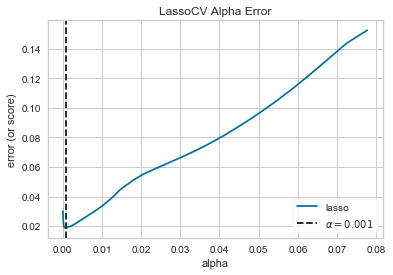

AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000268B98400B8>,
        is_fitted='auto', model=None)

In [9]:
#lib imported above
# Load dataset
X, y = (X_train, y_train)

# Use the quick method and immediately show the figure
alphas(LassoCV(random_state=42), X, y)

The optimal value for the alpha parameter is 0.001.

##### Re-fit the model after computing the optimal value for the  alpha parameter

In [10]:
#Initialize model.Use alpha =0.001 instead of 0.005 
select_vars = SelectFromModel(Lasso(alpha=0.001, random_state=42))# alpha: A Constant that multiplies the L1 term."The math behind it is pretty interesting, but practically, what you need to know is that Lasso regression comes with a parameter, alpha, and the higher the alpha, the most feature coefficients are zero.That is, when alpha is 0, Lasso regression produces the same coefficients as a linear regression." 
# fit model+
select_vars.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

##### Visualize variables that were selected

In [11]:
select_vars.get_support()

array([ True,  True, False,  True, False, False, False,  True, False,
        True, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True])

##### Print Selected variables

In [12]:
# Create a list of the selected variables
selected_features = X_train.columns[(select_vars.get_support())]

# let's print some stats
print(f'The total number of X_train features: {X_train.shape[1]}')#number of columns
print(f'The total number of selected X_train features {len(selected_features)}')
print(f'Features with coefficients shrank to zero: {np.sum(select_vars.estimator_.coef_ == 0)}')


The total number of X_train features: 79
The total number of selected X_train features 38
Features with coefficients shrank to zero: 41


In [13]:
#print variables that were selected using Lasso regression
selected_features

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'ScreenPorch', 'Fence', 'SaleCondition'],
      dtype='object')

##### Save Selected Variables

In [14]:
pd.Series(selected_features).to_csv('selected_features.csv', index=False)